# **Assignment 7 - Text Classification**
David Nguyen
<br><br/>
Dataset: https://www.kaggle.com/datasets/deepcontractor/200k-short-texts-for-humor-detection
<br><br/>
## Describe the data set and what the model should be able to predict.
---
This dataset classify if a piece of text is funny / a joke or not.



The model should be able to predict if a given piece of text is a joke or not.


In [13]:
# Import libraries
import nltk
nltk.download('stopwords')
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd

# set seed for reproducibility
np.random.seed(1234)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ndavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# read in dataset
df = pd.read_csv('./dataset.csv', header=0, usecols=[0,1], encoding='latin-1')
df["humor"] = df["humor"].astype(int) # turns humor column's T/F to int 1/0
print('rows and columns:', df.shape)
print(df.head())

# truncate dataframe cause collab session crashes
df = df.truncate(after=999)
print('\nrows and columns:', df.shape)

rows and columns: (200000, 2)
                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...      0
1  Watch: darvish gave hitter whiplash with slow ...      0
2  What do you call a turtle without its shell? d...      1
3      5 reasons the 2016 election feels so personal      0
4  Pasco police shot mexican migrant from behind,...      0

rows and columns: (1000, 2)


#  Create a graph showing the distribution of the target classes

---



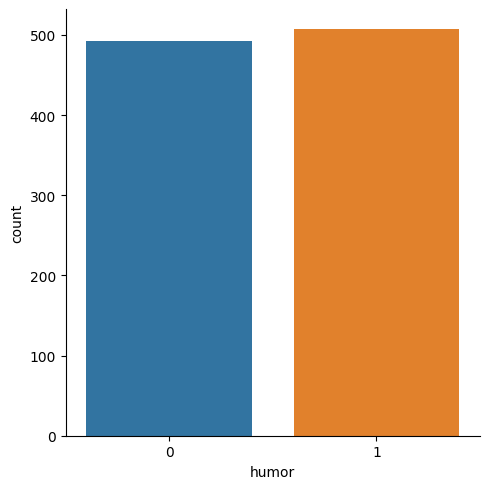

In [18]:
# Create a graph showing the distribution of the target classes
import seaborn as sb

# set up X and y
X = df.text
y = df.humor

df_y = pd.DataFrame(y,columns=['label'])
sb.catplot(x='humor', kind='count', data=df)

#   Divide into train/test. 
---




In [19]:
# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (781, 2)
test data size:  (219, 2)


In [20]:
# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.text)

x_train = tokenizer.texts_to_matrix(train.text, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.text, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.humor)
y_train = encoder.transform(train.humor)
y_test = encoder.transform(test.humor)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (781, 25000) (781,)
test shapes: (219, 25000) (219,)
test first five labels: [1 0 1 1 0]


# Create a sequential model and evaluate on the test data
---


In [21]:
# fit model
model = models.Sequential()
model.add(layers.Dense(16, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)


Epoch 1/30
8/8 [==============================] - 1s 25ms/step - loss: 0.6973 - accuracy: 0.4729 - val_loss: 0.6948 - val_accuracy: 0.5063
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 0.6794 - accuracy: 0.6624 - val_loss: 0.6882 - val_accuracy: 0.5696
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 0.6624 - accuracy: 0.8148 - val_loss: 0.6812 - val_accuracy: 0.6709
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 0.6403 - accuracy: 0.9017 - val_loss: 0.6717 - val_accuracy: 0.6835
Epoch 5/30
8/8 [==============================] - 0s 10ms/step - loss: 0.6104 - accuracy: 0.9487 - val_loss: 0.6585 - val_accuracy: 0.7342
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.5714 - accuracy: 0.9630 - val_loss: 0.6416 - val_accuracy: 0.7342
Epoch 7/30
8/8 [==============================] - 0s 10ms/step - loss: 0.5236 - accuracy: 0.9715 - val_loss: 0.6205 - val_accuracy: 0.7722
Epoch 8/30
8/8 [=============

In [22]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])
print(score)

3/3 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8037
Accuracy:  0.8036529421806335
[0.4449029564857483, 0.8036529421806335]


In [23]:
# get predictions so we can calculate more metrics
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]
pred[:10]


7/7 [==============================] - 0s 1ms/step


array([[0.9184874 ],
       [0.04617033],
       [0.70611864],
       [0.724794  ],
       [0.56553006],
       [0.6064179 ],
       [0.4050826 ],
       [0.9821706 ],
       [0.13977507],
       [0.050362  ]], dtype=float32)

In [24]:
pred_labels[:10]

[1, 0, 1, 1, 1, 1, 0, 1, 0, 0]

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels))
print('recall score: ', recall_score(y_test, pred_labels))
print('f1 score: ', f1_score(y_test, pred_labels))

accuracy score:  0.8036529680365296
precision score:  0.7698412698412699
recall score:  0.8738738738738738
f1 score:  0.818565400843882


# Try a different architecture like RNN, CNN, etc and evaluate on the test data
---
CNN

In [259]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

In [352]:
# build a Sequential model 1D convnet

model = models.Sequential()
model.add(layers.Embedding(vocab_size, 100)) 
model.add(layers.Conv1D(128, 5, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [353]:
model.summary()


Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_86 (Embedding)    (None, None, 100)         2500000   
                                                                 
 conv1d_5 (Conv1D)           (None, None, 128)         64128     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_221 (Dense)           (None, 10)                1290      
                                                                 
 dense_222 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,565,429
Trainable params: 2,565,429
Non-trainable params: 0
__________________________________________

In [354]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [355]:
# train

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 29s 4s/step - loss: 0.6863 - accuracy: 0.5785 - val_loss: 0.6825 - val_accuracy: 0.6178
Epoch 2/10
7/7 [==============================] - 26s 4s/step - loss: 0.6701 - accuracy: 0.6442 - val_loss: 0.6712 - val_accuracy: 0.6051
Epoch 3/10
7/7 [==============================] - 27s 4s/step - loss: 0.6502 - accuracy: 0.6763 - val_loss: 0.6616 - val_accuracy: 0.6115
Epoch 4/10
7/7 [==============================] - 28s 4s/step - loss: 0.6282 - accuracy: 0.6827 - val_loss: 0.6474 - val_accuracy: 0.5987
Epoch 5/10
7/7 [==============================] - 29s 4s/step - loss: 0.6031 - accuracy: 0.6907 - val_loss: 0.6375 - val_accuracy: 0.6242
Epoch 6/10
7/7 [==============================] - 38s 5s/step - loss: 0.5869 - accuracy: 0.6859 - val_loss: 0.6359 - val_accuracy: 0.6115
Epoch 7/10
7/7 [==============================] - 31s 4s/step - loss: 0.5692 - accuracy: 0.7163 - val_loss: 0.6196 - val_accuracy: 0.6369
Epoch 8/10
7/7 [==================

In [356]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])
print(score)

3/3 [==============================] - 2s 635ms/step - loss: 0.7020 - accuracy: 0.5982
Accuracy:  0.5981734991073608
[0.70196533203125, 0.5981734991073608]


In [357]:
# get predictions so we can calculate more metrics
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]
pred[:10]


7/7 [==============================] - 2s 340ms/step


array([[0.6611543 ],
       [0.66109216],
       [0.675054  ],
       [0.83450377],
       [0.86205626],
       [0.8364781 ],
       [0.6485921 ],
       [0.82774544],
       [0.876327  ],
       [0.36247322]], dtype=float32)

In [358]:
pred_labels[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [359]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels))
print('recall score: ', recall_score(y_test, pred_labels))
print('f1 score: ', f1_score(y_test, pred_labels))

accuracy score:  0.5981735159817352
precision score:  0.5583756345177665
recall score:  0.990990990990991
f1 score:  0.7142857142857143


# Try different embedding approaches and evaluate on the test data
---

In [341]:
# fit model
model = models.Sequential()
model.add(layers.Dense(64, input_dim=vocab_size, activation='relu'))
model.add(layers.Embedding(vocab_size, 16, input_length=100))
model.add(layers.Flatten())
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))




In [342]:
model.summary()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_219 (Dense)           (None, 64)                1600064   
                                                                 
 embedding_85 (Embedding)    (None, 64, 16)            400000    
                                                                 
 flatten_35 (Flatten)        (None, 1024)              0         
                                                                 
 dense_220 (Dense)           (None, 1)                 1025      
                                                                 
Total params: 2,001,089
Trainable params: 2,001,089
Non-trainable params: 0
_________________________________________________________________


In [343]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [344]:
# train

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 1s 30ms/step - loss: 0.6941 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.5032
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6935 - val_accuracy: 0.5032
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6934 - val_accuracy: 0.5032
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 8/10
7/7 [===========

In [345]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])
print(score)

3/3 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5068
Accuracy:  0.5068492889404297
[0.6930534243583679, 0.5068492889404297]


In [346]:
# get predictions so we can calculate more metrics
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]
pred[:10]

7/7 [==============================] - 0s 2ms/step


array([[0.50697374],
       [0.50697374],
       [0.50697374],
       [0.50697374],
       [0.50697374],
       [0.50697374],
       [0.50697374],
       [0.50697374],
       [0.50697374],
       [0.50697374]], dtype=float32)

In [348]:
pred_labels[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [349]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels))
print('recall score: ', recall_score(y_test, pred_labels))
print('f1 score: ', f1_score(y_test, pred_labels))

accuracy score:  0.5068493150684932
precision score:  0.5068493150684932
recall score:  1.0
f1 score:  0.6727272727272727


# analysis of the performance of various approaches
---

In accuracy, the Sequential model was the best and beat the CNN model and embedding approaches model by a large difference. In order from first to last, the scores for the models were 0.80, 0.60, and 0.51 respectively.
In precision, again, the sequential model beat both of the other models by relatively the same large difference/margin as in accuracy as the sequential model got 0.77, while the CNN model had 0.56 and third model had 0.51.
In recall score the situation was now different as the CNN model and embedding approaches model was able to get a score of 1, while the Sequential model had 0.87.
In the f1 score, the Sequential model won again with a 0.82 and the CNN had 0.71 and the third model had 0.67.
The CNN model took the longest to train and still only got second place so it has a large time drawback and even if it were more accurate, it would not be worth it or time efficient.
The sequential model was the best for this dataset and the third model was the worst in terms of accuracy but both were fast to train.